In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np

In [2]:
#load dataset
train_df = pd.read_csv('train_loan.csv')
test_df = pd.read_csv('test_loan.csv')

In [3]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
test_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002329,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [5]:
#Add the outcome variable to the test data
test_df['Loan_Status'] = -1

In [6]:
#concatenate both test and trrain data
df = pd.concat((train_df, test_df), axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d2ddf70>,
      dtype=object)

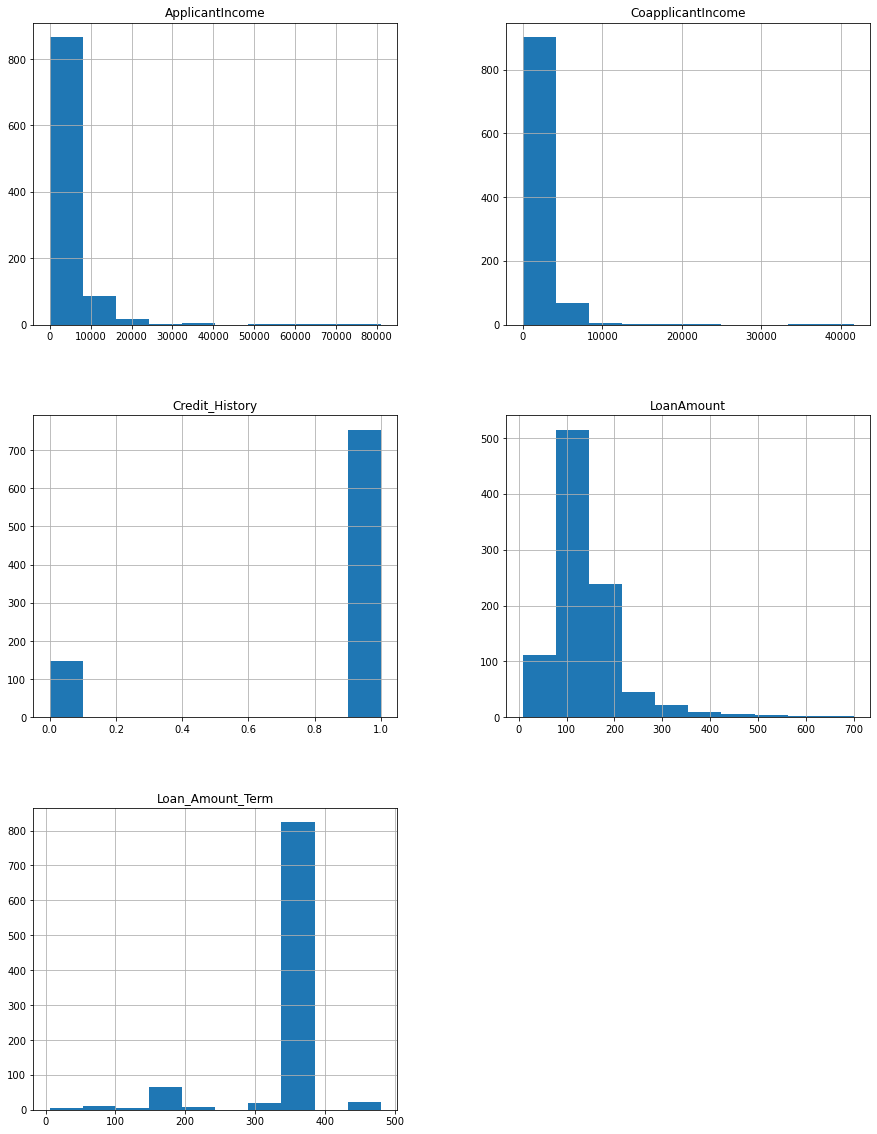

In [9]:
#show distribution of contunious variable
df.hist(figsize = (15,20))

Loan_ID


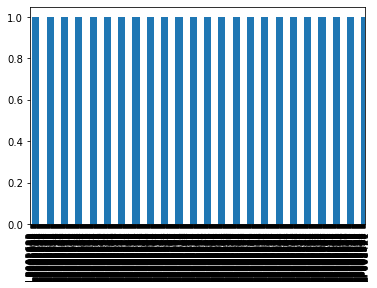

Gender


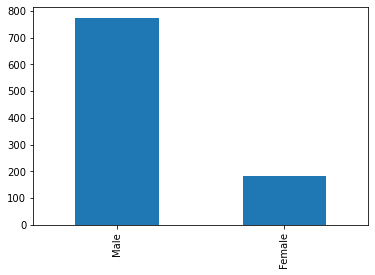

Married


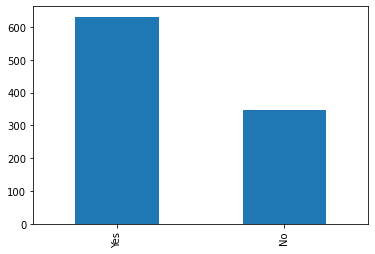

Dependents


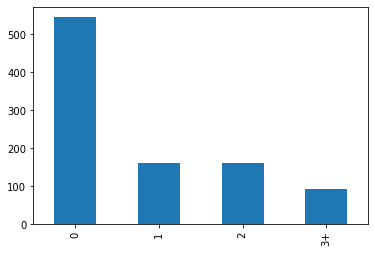

Education


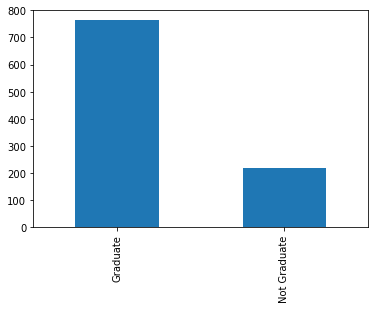

Self_Employed


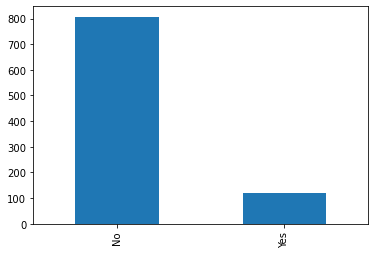

Property_Area


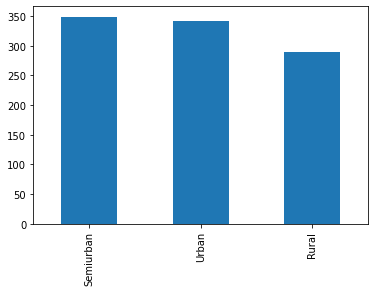

Loan_Status


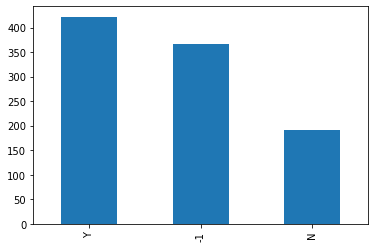

In [10]:
#plot bar graph for categorical variables
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=object).columns:
    print(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

In [28]:
#Map loan status Y and N to 1 and 0 respectively
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

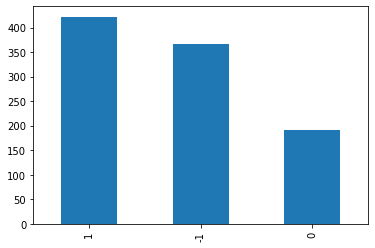

In [30]:
df['Loan_Status'].value_counts().plot(kind='bar')

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,0.056065
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.895520
min,0.000000,0.000000,9.000000,6.000000,0.000000,-1.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,-1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,0.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


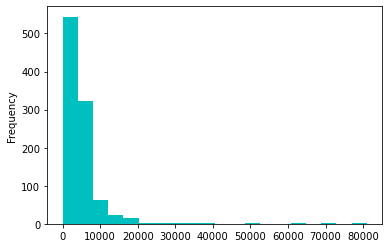

In [34]:
df.ApplicantIncome.plot(kind='hist', color='c', bins=20)

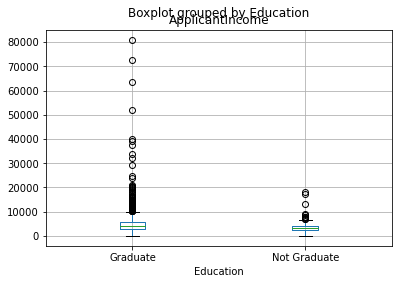

In [15]:
df.boxplot(column='ApplicantIncome', by='Education')

In [18]:
#Data Exploratory on Credit History
temp_data = df['Credit_History'].value_counts(ascending=True)
temp_data2 = df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print (temp_data)

print ('\nProbility of getting loan for each Credit History class:')
print (temp_data2)

0.0    148
1.0    754
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [28]:
married = df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('\nProbility of getting loan for Married against Not Married:')
print (married)


Probility of getting loan for Married against Not Married:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


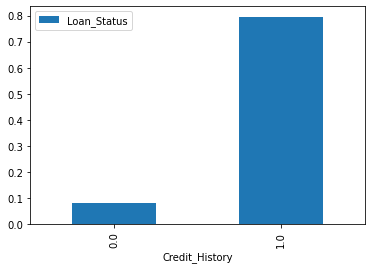

In [22]:
#probability of getting a loan due to your credit score
temp_data2.plot(kind='bar')

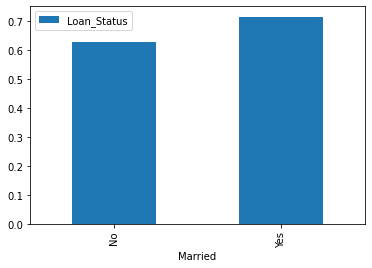

In [24]:
#probability of getting a loan by Marital status
married.plot(kind='bar')

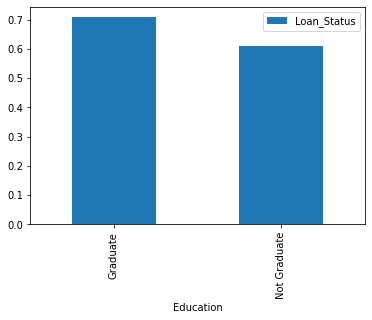

In [29]:
#probability of getting a loan by Education
degree = df.pivot_table(values='Loan_Status', index=['Education'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
degree.plot(kind='bar')

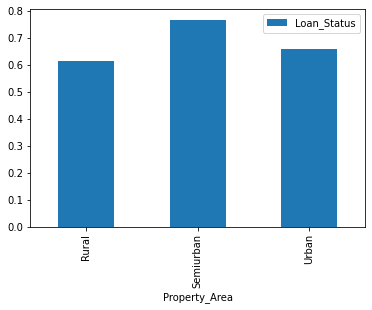

In [31]:
property_area = df.pivot_table(values='Loan_Status', index=['Property_Area'], aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
property_area.plot(kind='bar')

In [ ]:
#check for null data

In [37]:
df.apply(lambda x:sum(x.isnull()))

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
#replace missing values
df['Self_Employed'].fillna('No', inplace=True)